<a href="https://colab.research.google.com/github/Robiul564/Machine-Learning/blob/main/My_First_Machine_learning_model_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Making a ML model(Liner regresson)**

#**load Data**

In [4]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


#**Data preparation**

###**Data separetion of x and y**


In [5]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [6]:
x = df.drop('logS', axis= 1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Data spliliting

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [8]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


#**Model building**

## **Linear Regression**

### Traning the model

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Apply the model to make a prediction

In [10]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

###**Evaluate model performance**

In [12]:
from sklearn.metrics import mean_squared_error , r2_score

lr_train_MSE = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_MSE = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [14]:
print("Training Set Evaluation:")
print(f" - Mean Squared Error (MSE): {lr_train_MSE:.4f}")
print(f" - R² Score: {lr_train_r2:.4f}")

print("\nTest Set Evaluation:")
print(f" - Mean Squared Error (MSE): {lr_test_MSE:.4f}")
print(f" - R² Score: {lr_test_r2:.4f}")

Training Set Evaluation:
 - Mean Squared Error (MSE): 1.0075
 - R² Score: 0.7645

Test Set Evaluation:
 - Mean Squared Error (MSE): 1.0207
 - R² Score: 0.7892


## **Data ploting**

In [23]:
import matplotlib.pyplot as plt

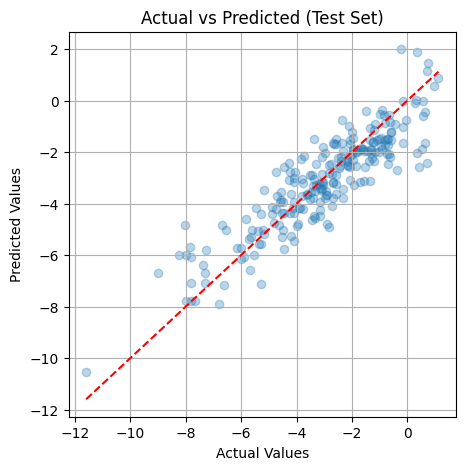

In [26]:
plt.figure(figsize=(5, 5))
plt.scatter(x=y_test, y=y_lr_test_pred, alpha = 0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Test Set)')
plt.grid(True)
plt.show()